In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('threads_reviews.csv')

In [4]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [5]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['month'] = df['review_date'].dt.month
df['date'] = df['review_date'].dt.date
df['week'] = df['review_date'].dt.dayofweek

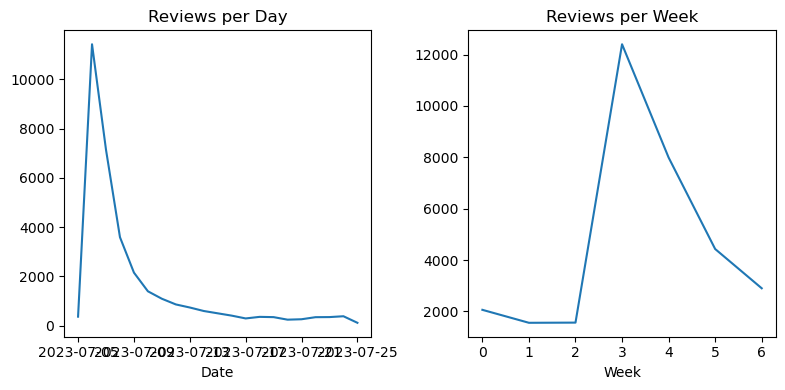

In [7]:
review_by_day = df['date'].value_counts().sort_index()
review_by_week = df['week'].value_counts().sort_index()


plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(review_by_day.index, review_by_day.values)
plt.title('Reviews per Day')
plt.xlabel('Date')

plt.subplot(132)
plt.plot(review_by_week.index, review_by_week.values)
plt.title('Reviews per Week')
plt.xlabel('Week')



plt.tight_layout()
plt.show()


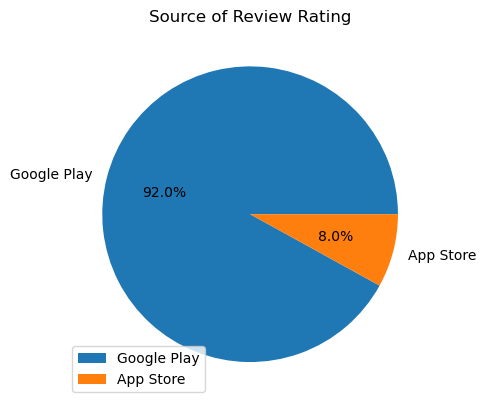

In [8]:
s=df['source'].value_counts()
labels=['Google Play','App Store']
plt.pie(s,labels=labels,autopct='%1.1f%%')
plt.title('Source of Review Rating')
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='source', ylabel='count'>

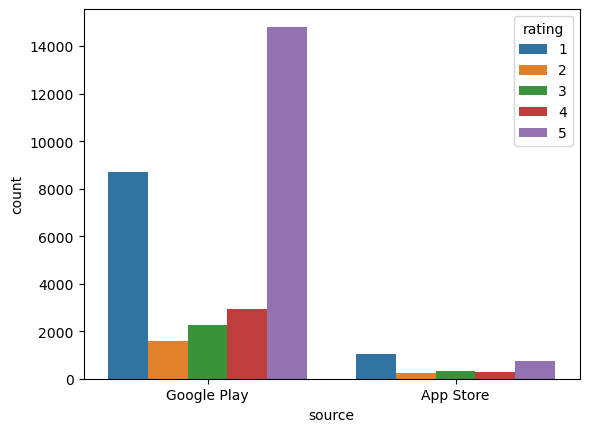

In [9]:
sns.countplot(x='source',data=df,hue='rating')

<Axes: xlabel='rating', ylabel='Count'>

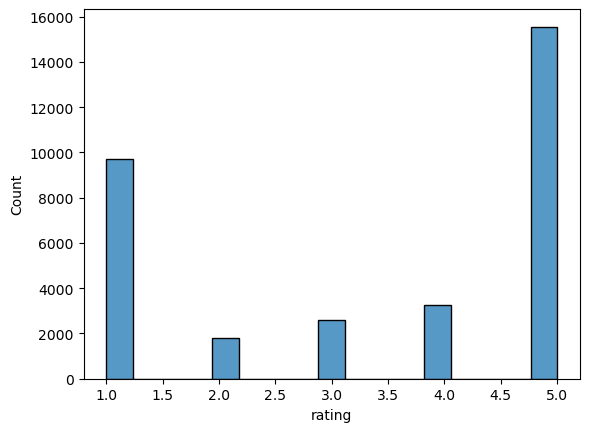

In [10]:
sns.histplot(x='rating',data=df)

In [11]:
df.drop(['source','review_date'],axis=1,inplace=True)

In [12]:
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})
df

,review_description,rating,month,date,week
0,Meh. Not the greatest experience on a Chromebo...,-1,7,2023-07-08,5
1,Pretty good for a first launch!! Its easy to u...,0,7,2023-07-19,2
2,"For a brand new app, it's very well optimized....",0,7,2023-07-06,3
3,"Great app with a lot of potential! However, th...",0,7,2023-07-10,0
4,"The app is good, but it needs a lot of functio...",0,7,2023-07-06,3
...,...,...,...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1,7,2023-07-06,3
32906,Add Search and hashtag like Twitter !,-1,7,2023-07-19,2
32907,bad twister,-1,7,2023-07-17,0
32908,Yet another trash from Meta.,-1,7,2023-07-07,4


In [14]:
df['rating'].unique()

array([-1,  0,  1], dtype=int64)

In [15]:
a=df.loc[df['rating']==-1][['review_description','rating']]
a

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,-1
5,"Currently, it's very challenging to use. It's ...",-1
6,I still don’t want to see content from people ...,-1
7,Could be great if all pages loaded when you cl...,-1
10,"Over all, the UI of this app is good. Using it...",-1
...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1
32906,Add Search and hashtag like Twitter !,-1
32907,bad twister,-1
32908,Yet another trash from Meta.,-1


In [17]:
pip install wordcloud


     -------------------------------------- 152.1/152.1 kB 1.5 MB/s eta 0:00:00


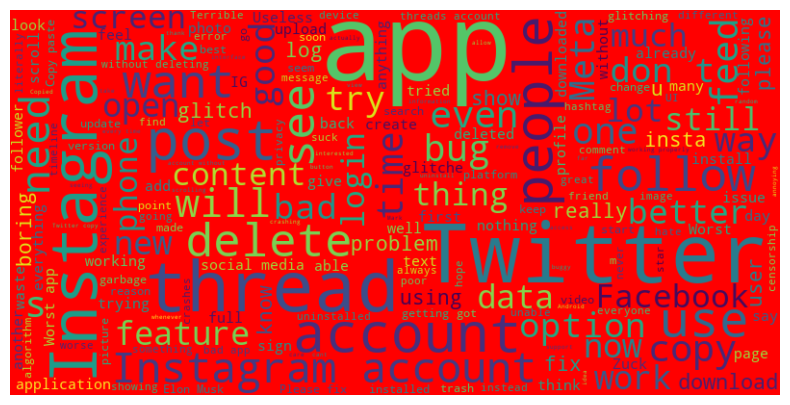

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already defined and initialized the variable 'text_corpus'

wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#plotting the word cloud of neutral values
b=df.loc[df['rating']==0][['review_description','rating']]
b

,review_description,rating
1,Pretty good for a first launch!! Its easy to u...,0
2,"For a brand new app, it's very well optimized....",0
3,"Great app with a lot of potential! However, th...",0
4,"The app is good, but it needs a lot of functio...",0
8,I'm liking the concept! There is room for impr...,0
...,...,...
32857,Please add arabic language .,0
32862,Add gyphy - to reply 🙏 love new apps!,0
32864,i really just wanna say anything i want,0
32870,Threads is Twitter without a soul. It’s not tr...,0


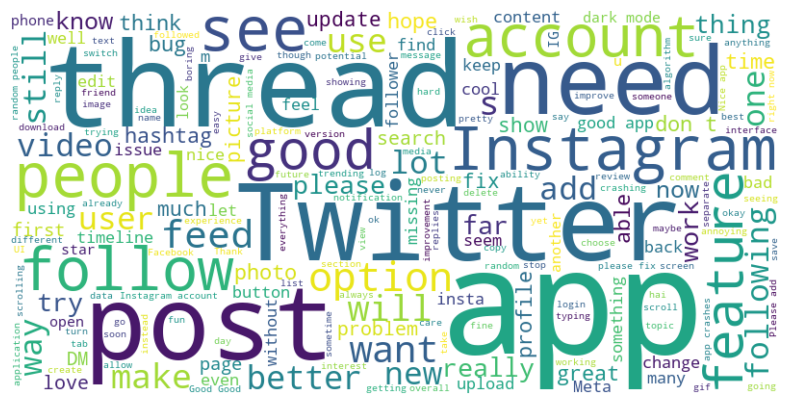

In [20]:
text_corpus = ' '.join(b['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()